# WQD7003 Data Analytics Group Project
## Loan Default Prediction
### Kaggle Dataset - https://www.kaggle.com/c/loan-default-prediction/overview


#### Import packages
- os     - operating system functionality
- pandas - manipulating data structures
- numpy - for scientific computing 

In [1]:
#import "as" simply means creating abbreviations as for easy referencing throughout

import os
import pandas as pd
import numpy as np
import seaborn as sns #for 
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) #to fit all columns in a line
pd.set_option('display.max_colwidth', -1)

#### Identify current working directory and dataset path
- Train and Test dataset provided.
- An example of sample submission also provided. 
- All dataset in CSV file format. 

In [2]:
cwd = os.getcwd()
print(cwd)


C:\Users\LP677XP\Desktop\UM SEM 2-2020\WQD7003-Data Analytics\Group Project\project_wqd7003


In [2]:
train_path = "C:\\Users\\LP677XP\\Desktop\\UM SEM 2-2020\\WQD7003-Data Analytics\\Group Project\\project_wqd7003\\Dataset\\train_v2.csv"
test_path = "C:\\Users\\LP677XP\\Desktop\\UM SEM 2-2020\\WQD7003-Data Analytics\\Group Project\\project_wqd7003\\Dataset\\test_v2.csv"

#### Load training data into Pandas dataframe
Note: to get hints to help with code completion, press "Tab" or "Shift + Tab"
1. We start by exploring the data.

In [5]:
# Have a look at training file size
file_size = int(os.path.getsize(train_path)/1024)  

if file_size > 99999:
    final_size = str(file_size/1000) + " MB"
else:
    final_size = str(file_size) + " KB"

print(final_size)

498.987 MB


In [3]:
df_train = pd.read_csv(train_path,low_memory=False,index_col=0)
#df_test = pd.read_csv(test_path,low_memory=False,index_col=0)

In [5]:
# Reduce code debug and training time, sample 20% of training dataset to iterate quickly through modelling. Applying 100%
# ready to train model. 

#df = pd.read_csv(train_path, low_memory=False, index_col=0)
#df_train = df.sample(frac=0.2, random_state=0)

In [4]:
#Find (rows,columns)

df_train.shape

(105471, 770)

In [10]:
#to take a quick look at the dataset, by taking the first 10 values
df_train[:10]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f338,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f390,f391,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f464,f465,f466,f467,f468,f469,f470,f471,f472,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f534,f535,f536,f537,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f604,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f626,f627,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f695,f696,f697,f698,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [5]:
#Describe dataset
#776 and 777 are known categorical fields

df_train.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f464,f465,f466,f467,f468,f470,f471,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f535,f536,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f604,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f696,f697,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,105471.000000,105471.000000,105371.000000,105423.000000,1.054710e+05,105312.000000,105448.000000,105448.000000,105011.000000,103631.000000,103773.000000,1.047730e+05,105471.000000,105471.000000,1.047730e+05,105471.0000

In [32]:
#by taking a quick look on the descriptive analysis above, it can observed that some columns have zero min and max
#this means that there are columns with all zeros, let's verify it

df_train.columns[(df_train == 0).all()]

Index(['f33', 'f34', 'f35', 'f37', 'f38', 'f700', 'f701', 'f702'], dtype='object')

In [4]:
#drop the columns with all zeros as they have no added values, no patterns can be obtained
df_train=df_train.drop(['f33', 'f34', 'f35', 'f37', 'f38', 'f700', 'f701', 'f702'],axis=1)
df_train.shape

(105471, 762)

In [1]:
#See number of unique values
#df_train.nunique()

In [11]:
#drop duplicates, no duplicates found
df_train=df_train.drop_duplicates()
df_train.shape

(105471, 762)

In [48]:
# Data types int64, float64, unicode_, complex128, object
col_names = df_train.columns.values

# Get  columns whose data type is object i.e. string, int64, float64
filtColObj = df_train.dtypes[df_train.dtypes == np.object]
filtColInt = df_train.dtypes[df_train.dtypes == np.int64]
filtColFlt = df_train.dtypes[df_train.dtypes == np.float64]
filtColStr = df_train.dtypes[df_train.dtypes == np.unicode_]
filtColCom = df_train.dtypes[df_train.dtypes == np.complex128]
 
# list of columns whose data type is object i.e. string, int64, float64
listColNamesObj = list(filtColObj.index)
listColNamesInt = list(filtColInt.index)
listColNamesFlt = list(filtColFlt.index)
listColNamesStr = list(filtColStr.index)
listColNamesCom = list(filtColCom.index)
 
print(str(len(listColNamesObj)) + " Objects")
print(str(len(listColNamesInt)) + " Int64")
print(str(len(listColNamesFlt)) + " Float64")
print(str(len(listColNamesStr)) + " String")
print(str(len(listColNamesCom)) + " Complex128")

19 Objects
90 Int64
652 Float64
0 String
0 Complex128


In [5]:
#to view columns with data type object

#first, create dataset with data type object
obj_df_train=df_train.select_dtypes(include=['object'])

#recheck if 19 columns as per above are extracted 
print(obj_df_train.shape)

#taking a quick look of the dataset
obj_df_train.head()

(105471, 19)


,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
id,,,,,,,,,,,,,,,,,,,
1,8090000000000000,754485076006959972352,3200000000000,38600000000000000,7900000000000000,683091368180479950848,7610000000000,10370164393071999997033054208,13621142007705000132589703585884798976,137000000000,511000000000000,569877634360569973702656,3427303293502300223465356001280,240811094251680005357568,1185103615651699994464937312256,11724173453590999285553430528,16027029142402000396838501389877379072,8700000000000000000,8010000000000000000
2,2250000000000,15300000000000000,392000000000,1690000000000000,92300000000000,2140000000000000000,796594176,5098137566366599989877014528,5366154527659000357778647583412977664,9483264,1593188352,107000000000000000,9894337169928600158208,251470350285930004480,161196782629860003268263936,6391495663130699779035627520,7158933769610900052770065343332745216,5890000000000000000,5030000000000000000
3,186000000000000,6910365323840000000,23700000000000,389000000000000000,10300000000000,69200000000000000,461000000000,26400269714792999161039945728,36117033568522998807722429270944907264,36051866452,63500000000000,313319151143610023936,222812827058929985669562368,116067852739909992448,61668865475731997253959680,36420952401170000260810932224,56027915541865997900093655676589441024,24512111987574001664,19855991371293999104
4,44500000000000000,11225194901267999096832,16098514954,35000000000000,22200000000000,295000000000000000,1330000000000,9333818143939599917454983168,12638526060843999893906772076814925824,5621900678,9380000000000,2641626213765599994052608,24452856014536001129152839155712,202899352692079984640,126293716597939998795235328,15267506423634001098621059072,24362045267421999852972382580757233664,9660000000000000000,6960000000000000000
5,52152926246,108000000000000,442000000000,1870000000000000,3630000000000,23100000000000000,2240000000000,196004669899870011305513451520,428213273484070002013091334592080642048,279000000000,659000000000000,68300000000000,922000000000000000,654000000000000000,89341826582645997305856,238204359524660008028924280832,550170020491249969340152709153269219328,108505460071560003584,94766610066210996224


In [16]:
#as observed above, the numbers appear to be extremely large
#describe columns with data type object
obj_df_train.describe()

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
count,105289,105289,104180,104180,105370,105370,105471,104773,104773,105471,105471,105471,105471,105471,105471,104773,104773,104773,104773
unique,4719,31151,15793,14510,4415,28709,8663,104661,104658,23557,25772,86420,102913,85376,104114,104753,104750,93729,91985
top,3870000000000000,0,0,0,1240000000000000,116000000000000000,0,44988370822808998216755838976,10282099893193000567930278379369005056,0,0,0,0,0,0,5167416158078900268779438080,7090680550168100523564513132407685120,2990000000000000000,3720000000000000000
freq,751,470,5144,5144,673,359,11875,3,3,11875,11875,520,520,243,243,3,3,24,34


In [6]:
#as observed above,the possibility of categorical values can be dropped as there are too many unique values
#therefore, the columns are dropped from further analysis
df_train=df_train.drop(obj_df_train.columns.values,axis=1)
df_train.shape

(105471, 743)

In [16]:
#find unique values, default argument don't include NaN/missing values

df_train.nunique().sort_values(ascending=True).head()

f764    1
f736    1
f678    1
f777    2
f776    2
dtype: int64

In [7]:
#drop columns with only one unique value, no pattern can be identified hence can be dropped
df_train=df_train.drop(['f764','f736','f678'],axis=1)
df_train.shape

(105471, 740)

In [41]:
#count number and percentage of null/missing values in each column
#display only 10

def missing(data):
    totalnumber=(data.isnull().sum()).sort_values(ascending=False)
    percentage=((data.isnull().sum())/(data.isnull().count())*100).sort_values(ascending=False)
    table=pd.concat([totalnumber,percentage],axis=1,keys=['Total','Percentage'])
    table=table[table['Total']>0]
    return table[:10]

missing(df_train)

,Total,Percentage
f663,18833,17.856093
f662,18833,17.856093
f160,18736,17.764125
f159,18736,17.764125
f170,18417,17.461672
f169,18417,17.461672
f618,18407,17.452191
f619,18407,17.452191
f330,18067,17.129827
f331,18067,17.129827


As observed above, data have less than 20% missing value rate. At this point, we will not choose to drop the variables. Next we will attempt to use imputations to replace the missing values

In [79]:
#Separate data with and without missing values
df_train_not_null = df_train.loc[:,df_train.isnull().mean()==0]
df_train_null = df_train.loc[:,df_train.isnull().mean()>0]

In [80]:
df_train_not_null.shape

(105471, 228)

In [9]:
#First, describe the data with missing values
df_train_null.describe()

,f7,f8,f14,f15,f17,f18,f19,f20,f21,f22,f23,f26,f31,f32,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f72,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f278,f279,f280,f289,f330,f331,f340,f341,f348,f349,f350,f356,f357,f358,f365,f366,f367,f373,f374,f375,f384,f385,f386,f387,f388,f389,f392,f393,f394,f397,f398,f399,f401,f402,f412,f413,f422,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f448,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f468,f471,f476,f479,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f516,f517,f518,f522,f525,f527,f528,f533,f536,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f600,f601,f604,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f671,f672,f673,f675,f676,f677,f679,f694,f696,f697,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f716,f717,f718,f719,f720,f721,f726,f735,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f765,f774,f775
count,105289.000000,105370.000000,105371.000000,105423.000000,105312.000000,105448.000000,105448.000000,105011.000000,103631.000000,103773.000000,1.047730e+05,1.047730e+05,104773.000000,102899.000000,105417.000000,105417.000000,105469.000000,105469.000000,105237.000000,104508.000000,103393.000000,103393.000000,104618.000000,104618.000000,105373.000000,105373.000000,105469.000000,105469.000000,105251.000000,104521.000000,105417.000000,105417.000000,105469.000000,105469.000000,103592.000000,103592.000000,104671.000000,104671.000000,104317.000000,104317.000000,105313.000000,104822.000000,96469.000000,105136.000000,105136.000000,105289.000000,105289.000000,105289.000000,105125.000000,105125.000000,105136.000000,105136.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,103752.000000,103752.000000,105136.000000,105136.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,103767.000000,103767.000000,105136.000000,105136.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,103980.000000,103980.000000,105136.000000,105136.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,104350.000000,104350.000000,105136.000000,105136.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,105289.000000,104663.000000,104663.000000,105136.000000,105136.000000,105289.000000,1.052890e+05,1.052890e+05,105289.000000,104789.000000,104789.000

['f83' 'f93' 'f103' 'f113' 'f123' 'f152' 'f162' 'f172' 'f182' 'f192'
 'f222' 'f232' 'f242' 'f252' 'f262' 'f679']


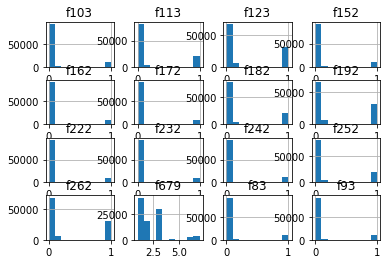

,Total,Percentage
f679,6393,6.061382
f192,2561,2.428156
f182,2561,2.428156
f172,2561,2.428156
f162,2561,2.428156
f152,2561,2.428156
f123,335,0.317623
f113,335,0.317623
f103,335,0.317623
f93,335,0.317623


In [42]:
#we hypothesize that columns with less than 10 unique are categorical 
#taking a look at distribution plot of columns with less than 10 unique values
cat10=df_train_null.loc[:,df_train_null.nunique()<=10]
print(cat10.columns.values)
cat10.hist()
plt.show()
missing(cat10)

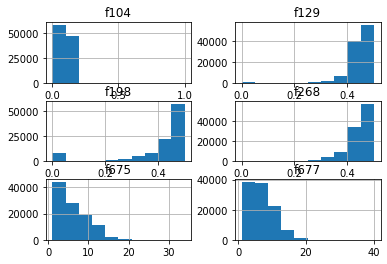

f104    40
f129    38
f198    39
f268    40
f675    34
f677    34
dtype: int64


In [44]:
#as it appears in the histogram above, the values are not continuous.
#next, we expand this to less than 50 unique values
cat50=df_train_null.loc[:,df_train_null.nunique()<=40]
cat50=cat50.drop(cat10.columns.values,axis=1)
cat50.hist()
plt.show()
missing(cat50)
print(cat50.nunique())

Data with less than 10 unique values do not have continuous distribution. We will assume as categorical variables.\
Data with between 10 to 50 unique values have a generally continuous distribution. Hence, we will not assume these variables as categorical.\

# note:to decide later impute by mode, mean, new category or drop, can try correlating

In [46]:
#putting aside categorical columns first 
df_train_null=df_train_null.drop(cat10.columns.values,axis=1)
df_train_null.shape

(105471, 496)

### We are required to determine:
1. Whether a loan will default
2. Loss incurred when loan defaults

Note that if the loss=0 represents loans that did not default \
Thus, we will separate our data into two: 
1. Create a new field, "default" with if loss=0, default=0, if loss>0, default=1
2. Extract loss>0 data

In [103]:
#Creating a default field
df_train['default']=np.where(df_train['loss']>0,1,0)

In [104]:
#Extract loss data
df_loss=df_train[(df_train.loss>0)]
df_loss.shape

(9783, 741)

AxesSubplot(0.125,0.125;0.775x0.755)
Skewness is 2


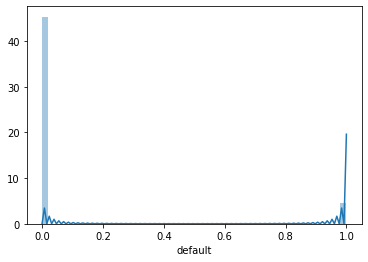

In [105]:
#check the distribution of our dependent variable, "default" and "loss"
#histogram
print(sns.distplot(df_train['default']))

#skewness
skewness=df_train['default'].skew()
print("Skewness is %d"%(skewness))


AxesSubplot(0.125,0.125;0.775x0.755)
Skewness is 4


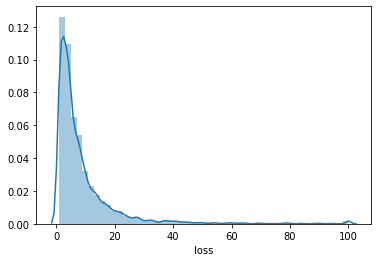

In [107]:
#check the distribution of our dependent variable, "loss"
#histogram
print(sns.distplot(df_loss['loss']))

#skewness
skewness=df_loss['loss'].skew()
print("Skewness is %d"%(skewness))

#therefore?

Since we have a large number of variables, it is not practical to analyze every single variable. We will start off by correlating the independent variables to our dependent variables.

In [116]:
#taking top 20 variables
df_train_corr=df_train.corr()
df_loss_corr=df_loss.corr()

print("Default")
print(df_train_corr['default'].sort_values(ascending=False)[:21])
print()
print("Loss")
print(df_loss_corr['loss'].sort_values(ascending=False)[:21])

Default
default    1.000000
loss       0.578713
f322       0.123838
f323       0.111113
f314       0.110452
f376       0.103534
f377       0.103520
f25        0.101329
f324       0.100614
f31        0.099947
f26        0.099430
f315       0.099011
f191       0.098412
f263       0.093353
f253       0.093152
f223       0.090353
f228       0.090279
f514       0.089997
f181       0.089892
f193       0.089451
f316       0.088962
Name: default, dtype: float64

Loss
loss    1.000000
f404    0.377786
f766    0.377357
f629    0.352137
f281    0.351899
f405    0.339958
f767    0.339759
f676    0.324763
f765    0.324763
f630    0.322511
f675    0.311516
f282    0.311047
f402    0.308460
f400    0.295335
f768    0.288558
f406    0.288557
f13     0.268900
f68     0.268435
f397    0.259530
f597    0.258219
f599    0.258219
Name: loss, dtype: float64


# IGNORE HERE ONWARDS (to be continued later),auto

First we would like to determine whether data have outliers \
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/ 

Using statistics to identify outliers:
1. Standard Deviation - For Gaussian and Gaussian-like distributions 
2. Interquartile Range - For Non Gaussian distributions

We will use 3 standard deviation (sd) as a threshold to detect outliers where it represents 99.7% of values are within 3 sd of the mean. In other words, values with greater than 3sd from the mean are considered as outliers.\
https://www.mathsisfun.com/data/standard-normal-distribution.html 

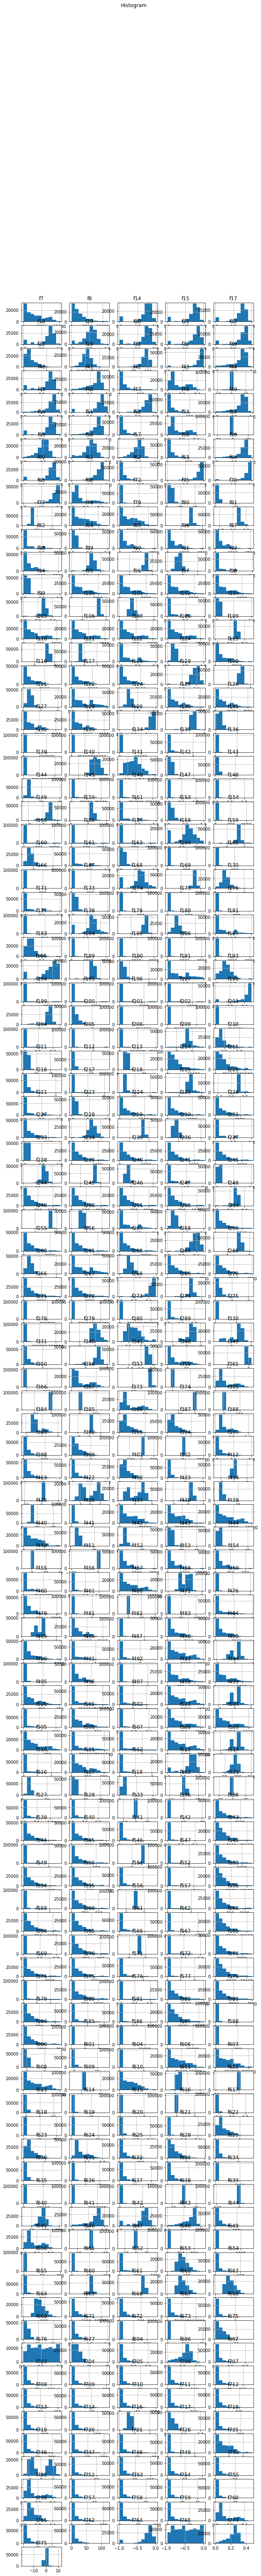

In [74]:
#sketch histogram to view distribution

fig = plt.figure(figsize = (10,100))
fig.suptitle('Histogram')
fig.tight_layout()

j = 0

for i in df_train_null.columns:
    ax = fig.add_subplot(100,5, j+1)
    ax.set_title(i)
    df_train_null[i].hist()
    j += 1

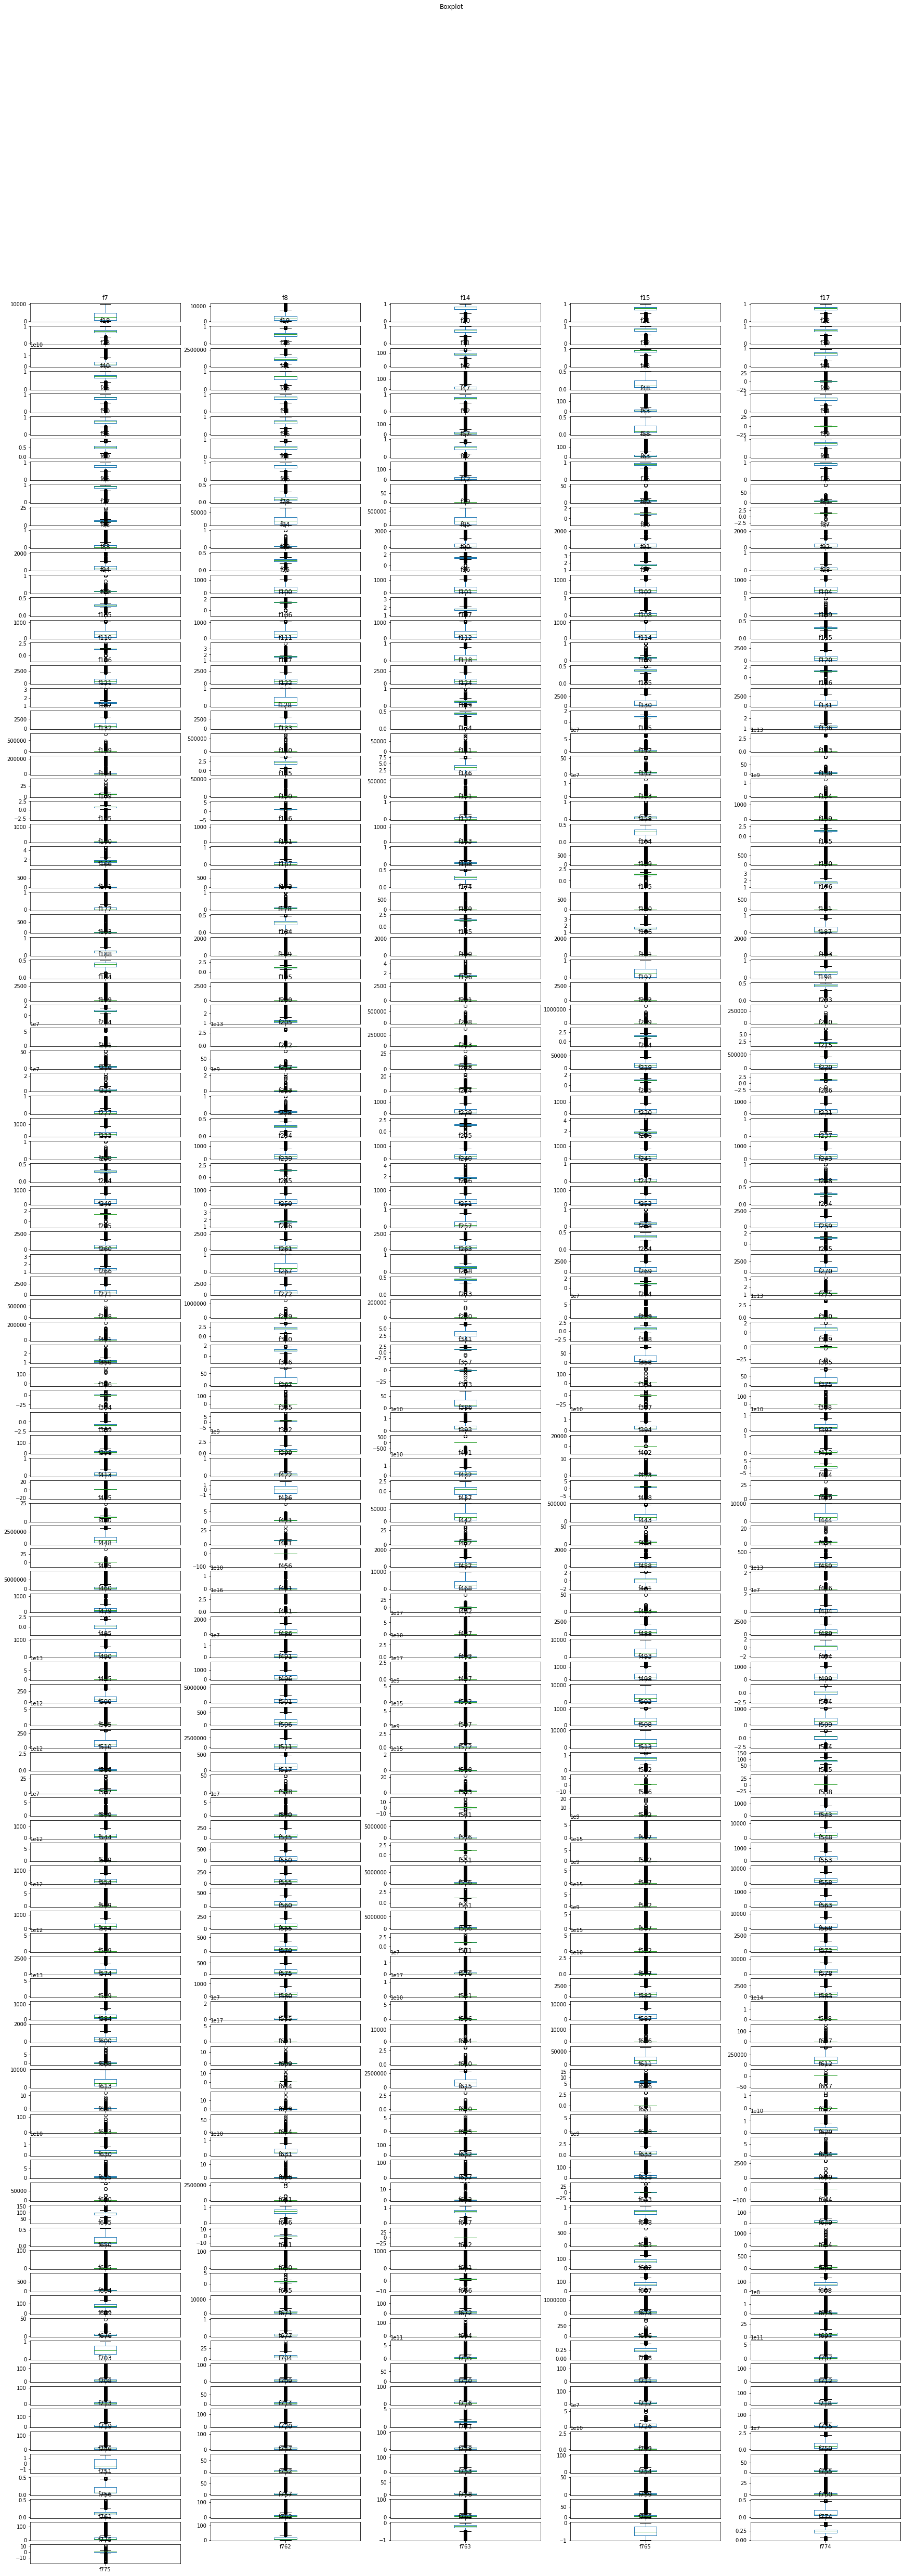

In [77]:
#based on the histogram above, most of the variables appear not normally distributed
#sketch boxplot

fig = plt.figure(figsize = (30,80))
fig.suptitle('Boxplot')
fig.tight_layout()

j = 0

for i in df_train_null.columns:
    ax = fig.add_subplot(100,5, j+1)
    ax.set_title(i)
    df_train_null[i].plot.box()
    j += 1

In [ ]:
#compare mean median mode

# note: check if the outlier analysis can use to drop observations later for modelling data

(Notes to paraphrase later) FOR MCAR: 
As a rule of thumb, if less than 5% of the observations are missing, the missing data can simply be deleted without any significant ramifications (3). However, if more than 5% of the data is missing, deleting the missing data will result in a reduced sample size and an increased standard error of the parameter estimates. In this case, it is strongly suggested to use imputation of the mean, median or mode, or multiple imputation, to fill in the missing data.
http://www.hubresearch.ca/bridging-the-data-gap-how-to-deal-with-missing-data-in-observational-studies/